In [1]:
# check if packages can be loaded, i.e. they are already installed
library(glmnet) # shrinkage regression
library(ISLR2) # for data sets

Loading required package: Matrix

Loaded glmnet 4.1-8



2 Ridge and Lasso Regression

2.1 The baseball Hitters data

In [2]:
#==============================================================================#
# Shrinkage Regression: Lab Section 6.5.2                                      #
# James et al.  (https://www.statlearning.com/)                                #
#==============================================================================#
rm(list = ls(all.names = TRUE))


# 00: packages -----------------------------------------------------------------
library(glmnet)
library (ISLR2)

In [3]:
# 01: data preparation ---------------------------------------------------------
data("Hitters")
summary(Hitters)
Hitters <- na.omit(Hitters)

     AtBat            Hits         HmRun            Runs       
 Min.   : 16.0   Min.   :  1   Min.   : 0.00   Min.   :  0.00  
 1st Qu.:255.2   1st Qu.: 64   1st Qu.: 4.00   1st Qu.: 30.25  
 Median :379.5   Median : 96   Median : 8.00   Median : 48.00  
 Mean   :380.9   Mean   :101   Mean   :10.77   Mean   : 50.91  
 3rd Qu.:512.0   3rd Qu.:137   3rd Qu.:16.00   3rd Qu.: 69.00  
 Max.   :687.0   Max.   :238   Max.   :40.00   Max.   :130.00  
                                                               
      RBI             Walks            Years            CAtBat       
 Min.   :  0.00   Min.   :  0.00   Min.   : 1.000   Min.   :   19.0  
 1st Qu.: 28.00   1st Qu.: 22.00   1st Qu.: 4.000   1st Qu.:  816.8  
 Median : 44.00   Median : 35.00   Median : 6.000   Median : 1928.0  
 Mean   : 48.03   Mean   : 38.74   Mean   : 7.444   Mean   : 2648.7  
 3rd Qu.: 64.75   3rd Qu.: 53.00   3rd Qu.:11.000   3rd Qu.: 3924.2  
 Max.   :121.00   Max.   :105.00   Max.   :24.000   Max.   :14053.0 

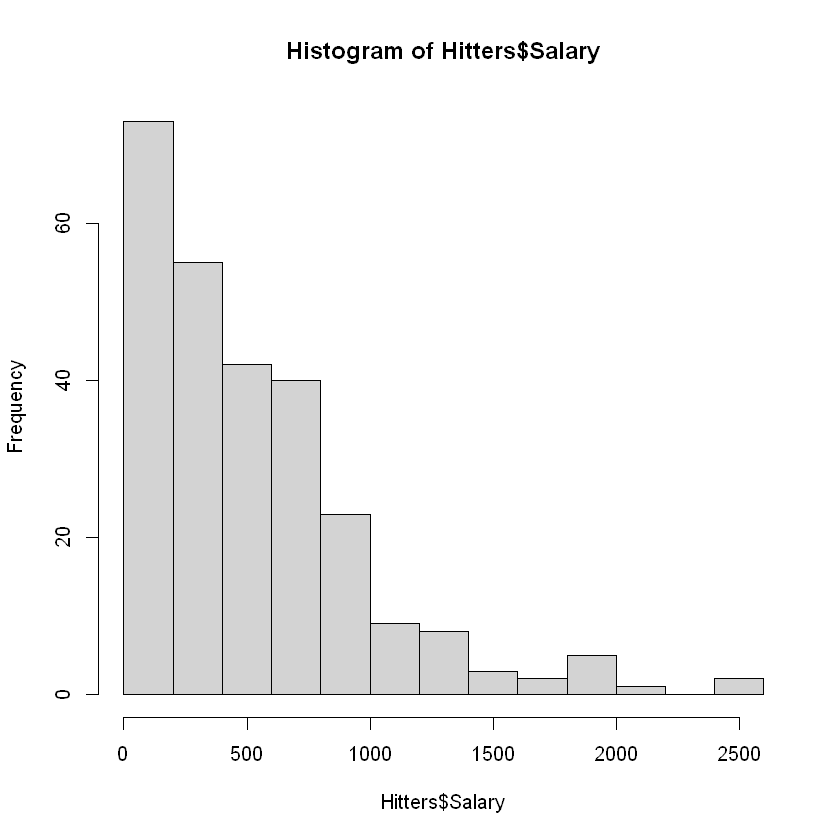

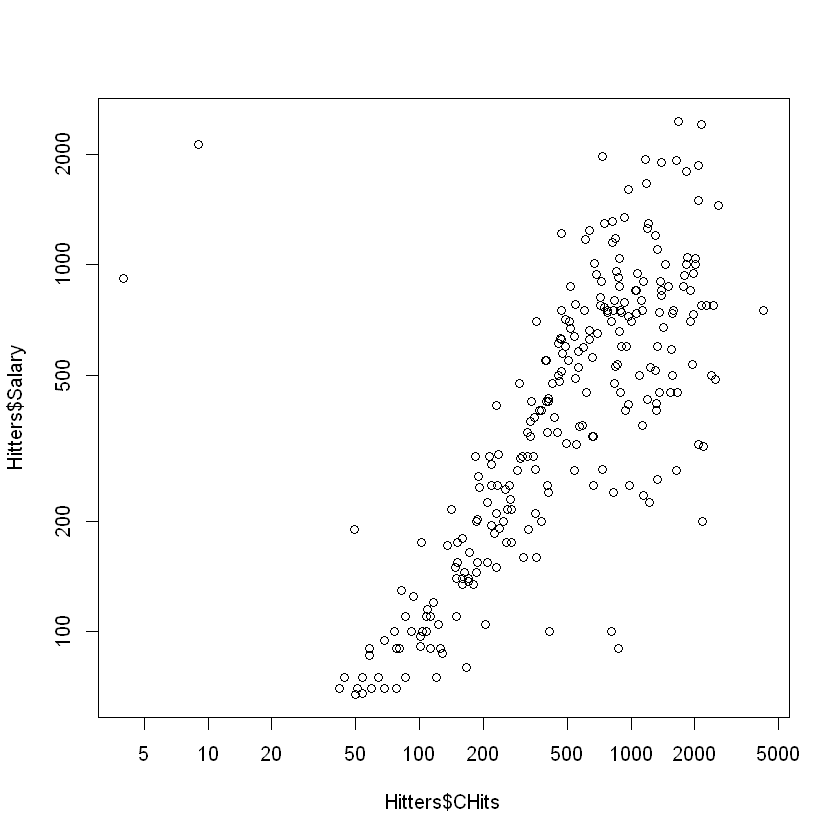

In [4]:
# 03: data exploration ---------------------------------------------------------
hist(Hitters$Salary)
plot(Hitters$CHits, Hitters$Salary, log="xy")


[1]  20 100

[1] 11497.57

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

[1] 6.360612

[1] 705.4802

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 54.32519950   0.11211115   0.65622409   1.17980910   0.93769713   0.84718546 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.31987948   2.59640425   0.01083413   0.04674557   0.33777318   0.09355528 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.09780402   0.07189612  13.68370191 -54.65877750   0.11852289   0.01606037 
      Errors   NewLeagueN 
 -0.70358655   8.61181213

[1] 57.11001

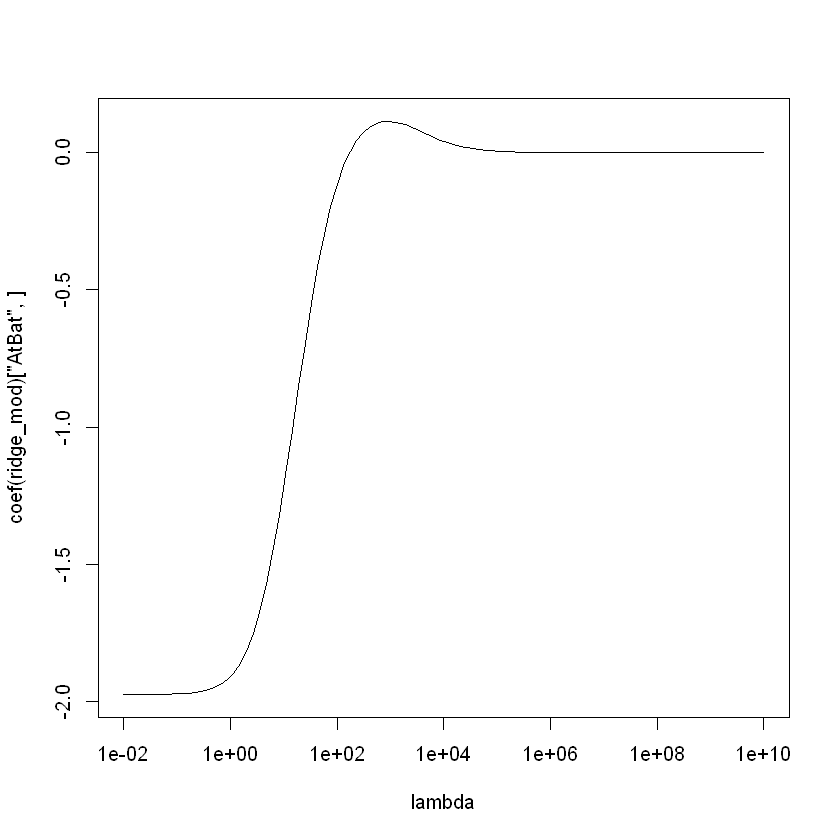

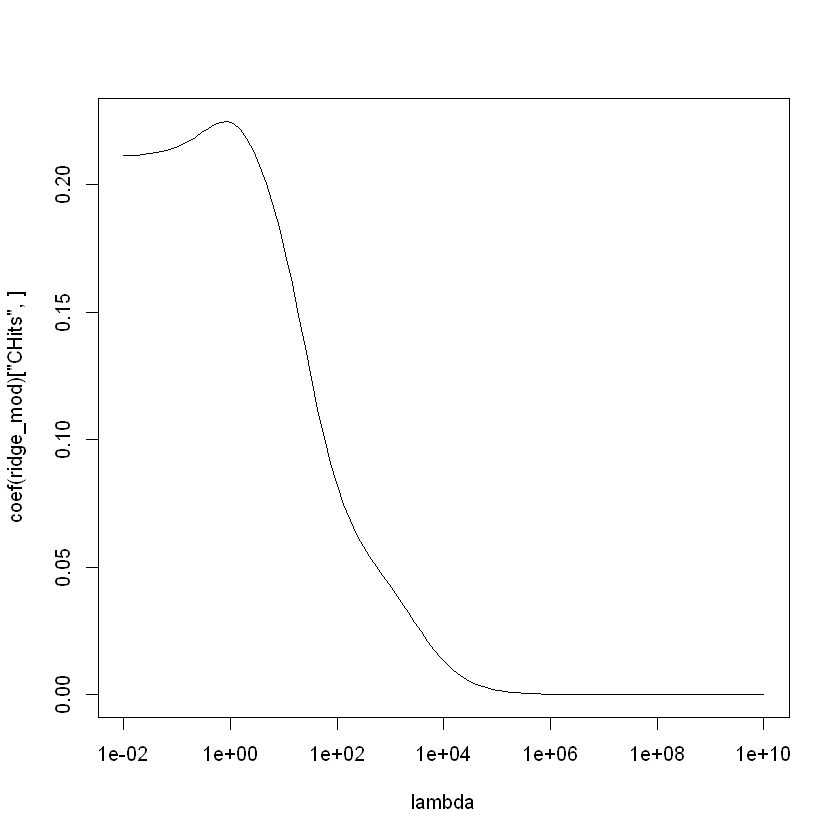

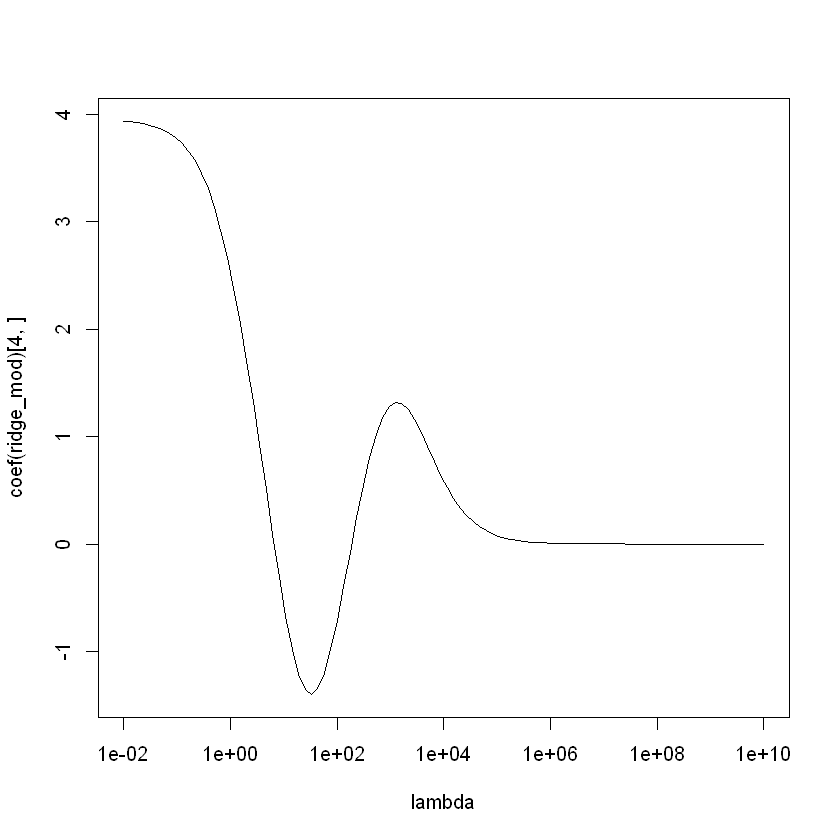

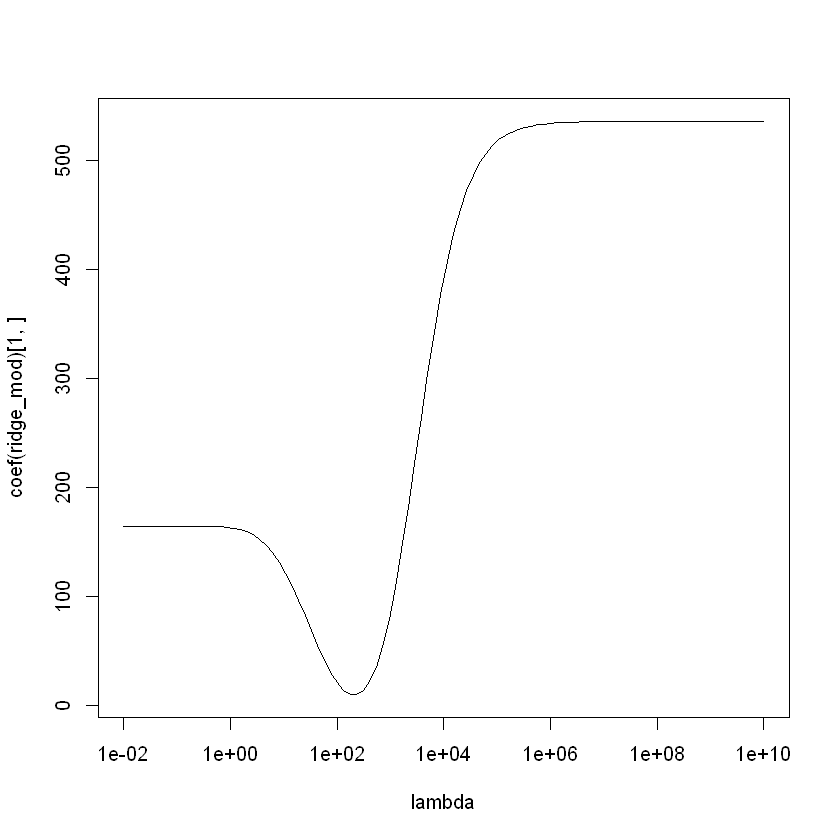

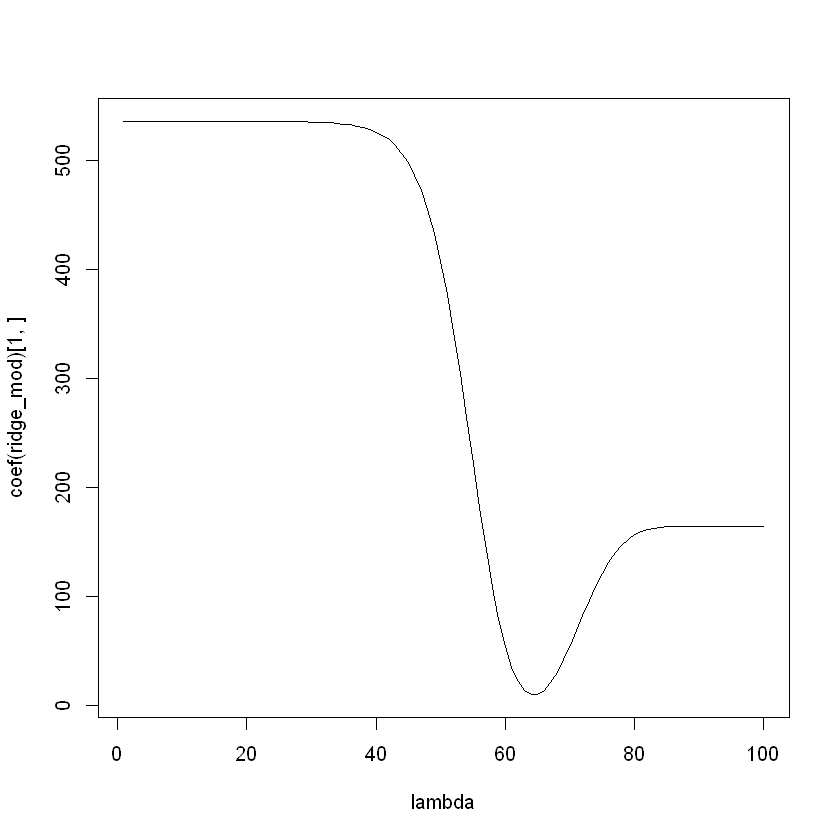

In [5]:
# 02: ridge regression ---------------------------------------------------------
x <- model.matrix (Salary ~ ., Hitters)[, -1]
y <- Hitters$Salary
grid <- 10^seq(10, -2, length = 100)
ridge_mod <- glmnet(x, y, alpha = 0, lambda = grid)
dim(coef(ridge_mod ))

# strong penalization
ridge_mod$lambda[50]
coef(ridge_mod)[, 50]
sqrt(sum(coef(ridge_mod)[-1, 50]^2))

# weaker penalization
ridge_mod$lambda[60]
coef(ridge_mod)[, 60]
sqrt(sum(coef(ridge_mod)[-1, 60]^2))

# Add plots for change in coeff wrt lambda
plot(grid, coef(ridge_mod)["AtBat", ], log = "x", type = "l", xlab = "lambda")
plot(grid, coef(ridge_mod)["CHits", ], log = "x", type = "l", xlab = "lambda")

plot(grid, coef(ridge_mod)[4, ], log = "x", type = "l", xlab = "lambda")
plot(grid, coef(ridge_mod)[1, ], log = "x", type = "l", xlab = "lambda")
plot(coef(ridge_mod)[1, ], type = "l", xlab = "lambda")

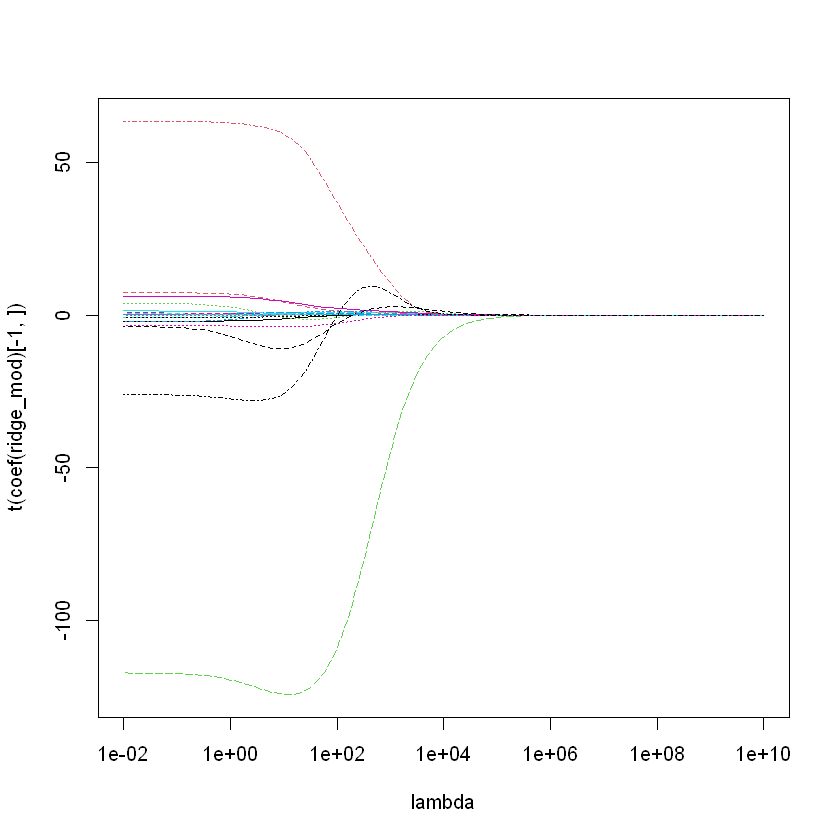

(Intercept)         AtBat          Hits         HmRun          Runs 
 4.876610e+01 -3.580999e-01  1.969359e+00 -1.278248e+00  1.145892e+00 
          RBI         Walks         Years        CAtBat         CHits 
 8.038292e-01  2.716186e+00 -6.218319e+00  5.447837e-03  1.064895e-01 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
 6.244860e-01  2.214985e-01  2.186914e-01 -1.500245e-01  4.592589e+01 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-1.182011e+02  2.502322e-01  1.215665e-01 -3.278600e+00 -9.496680e+00

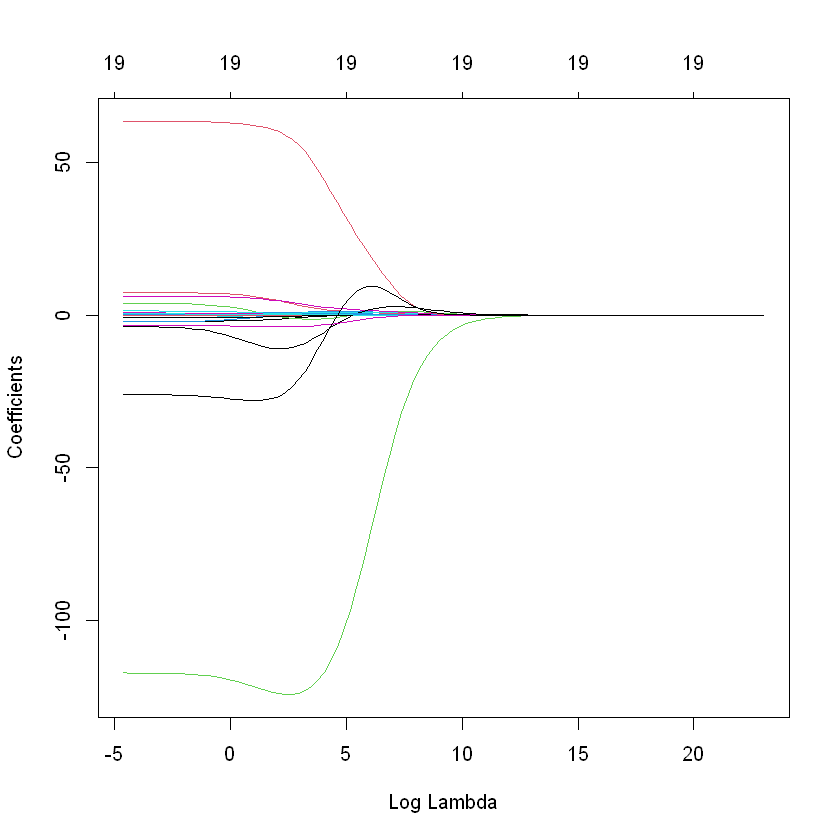

In [6]:
# All together except the intercept
matplot(grid, t(coef(ridge_mod)[-1, ]), type = "l", log = "x", xlab = "lambda")
# If you plot ridge_mod then you get a very similar plot 
plot(ridge_mod,xvar="lambda")

# Predictions
predict (ridge_mod ,s=50, type ="coefficients")[1:20 ,]

In [7]:
# Train/Test split
set.seed (1)
train <- sample (1: nrow(x), nrow(x)/2)
test <- (-train)
y_test <- y[test]

ridge_mod <- glmnet(x[train, ], y[train], alpha = 0, lambda = grid, thresh = 1e-12)
ridge_pred <- predict(ridge_mod, s = 4, newx = x[test, ])
# Test: MSE
mean((ridge_pred - y_test)^2)

# Intercept Model: MSE
mean(( mean(y[train ])-y_test)^2)

# Test-MSE for very large penalization
ridge_pred <- predict (ridge_mod , s= 1e10, newx = x[test, ])
mean((ridge_pred - y_test)^2)

[1] 142199.2

[1] 224669.9

[1] 224669.8

In [8]:
# Comparison with OLS regression:
ridge_pred <- predict(ridge_mod, s = 0, newx = x[test, ], exact = TRUE, 
                      x = x[train, ], y = y[train])
mean((ridge_pred - y_test)^2)
lm(y ~ x, subset =train)$coefficients
predict(ridge_mod, s = 0, exact = TRUE, x = x[train, ], 
        y = y[train], type = "coefficients")[1:20, ]

[1] 168588.6

(Intercept)       xAtBat        xHits       xHmRun        xRuns         xRBI 
 274.0144927   -0.3520562   -1.6376655    5.8144925    1.5424053    1.1243359 
      xWalks       xYears      xCAtBat       xCHits      xCHmRun       xCRuns 
   3.7286829  -16.3772548   -0.6411948    3.1632067    3.4007822   -0.9739418 
       xCRBI      xCWalks     xLeagueN   xDivisionW     xPutOuts     xAssists 
  -0.6005138    0.3378721  119.1486329 -144.0831102    0.1976332    0.6804341 
     xErrors  xNewLeagueN 
  -4.7127689  -71.0951127

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 274.0200994   -0.3521900   -1.6371383    5.8146692    1.5423361    1.1241837 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   3.7288406  -16.3795195   -0.6411235    3.1629444    3.4005281   -0.9739405 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  -0.6003976    0.3378422  119.1434637 -144.0853061    0.1976300    0.6804200 
      Errors   NewLeagueN 
  -4.7127879  -71.0898914

[1] 326.0828

[1] 139856.6

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 15.44383120   0.07715547   0.85911582   0.60103106   1.06369007   0.87936105 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.62444617   1.35254778   0.01134999   0.05746654   0.40680157   0.11456224 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.12116504   0.05299202  22.09143197 -79.04032656   0.16619903   0.02941950 
      Errors   NewLeagueN 
 -1.36092945   9.12487765

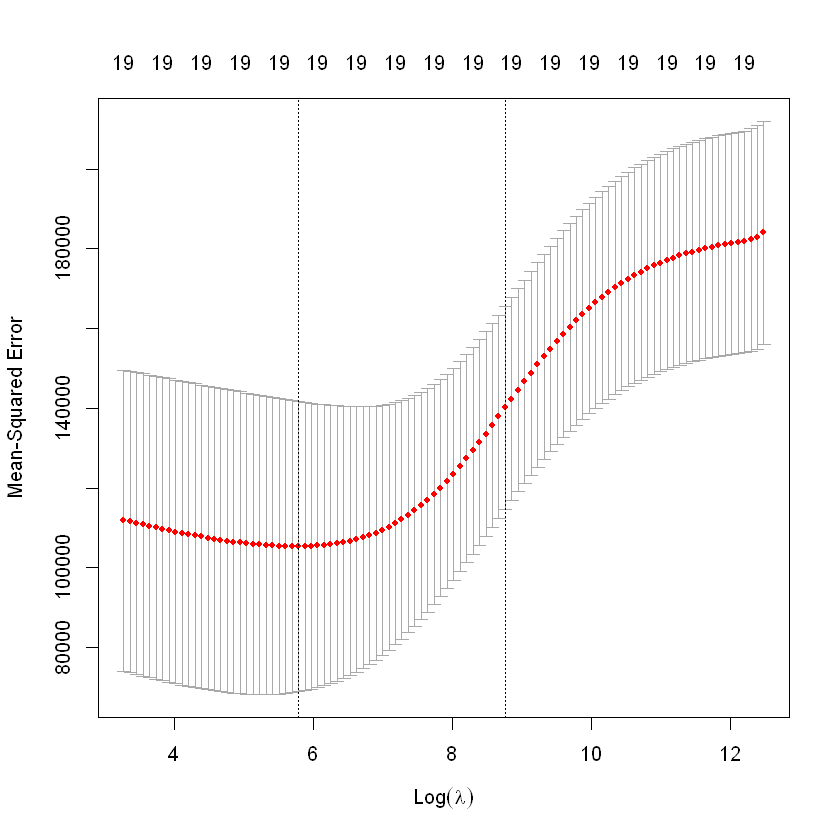

In [9]:
# 02b: Ridge CV: ---------------------------------------------------------------
set.seed (1)
cv_out <- cv.glmnet(x[train, ], y[train], alpha = 0)
plot(cv_out)
bestlam = cv_out$lambda.min
bestlam

ridge_pred <- predict(ridge_mod, s = bestlam, newx = x[test, ])
mean((ridge_pred - y_test)^2)

out <- glmnet (x, y, alpha = 0)
predict(out, type = "coefficients", s = bestlam )[1:20, ]

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"


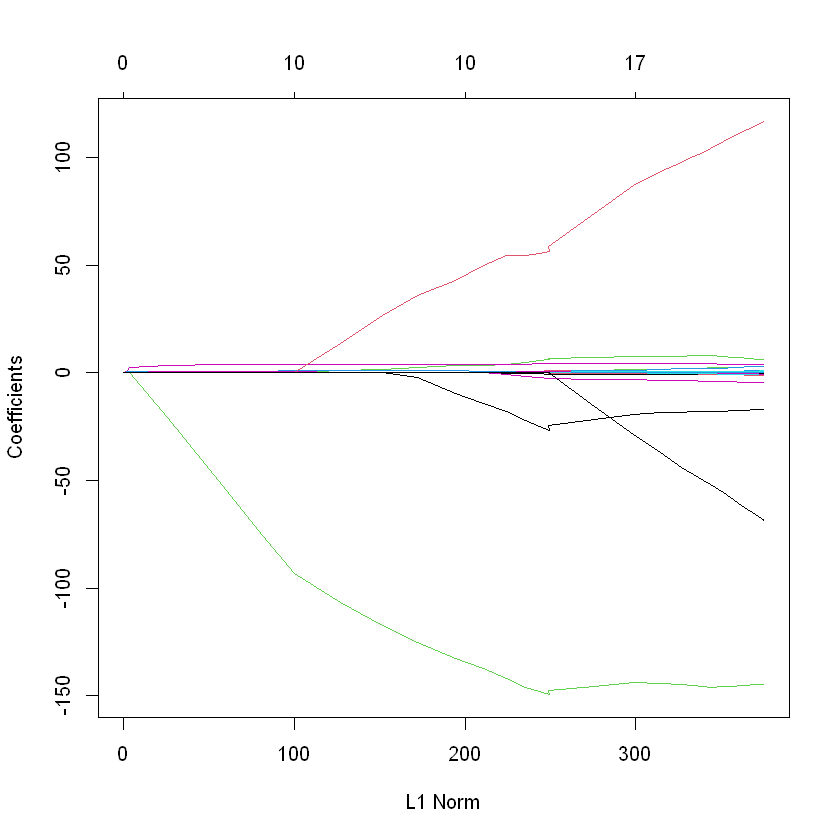

[1] 9.286955

[1] 143673.6

(Intercept)         AtBat          Hits         HmRun          Runs 
   1.27479059   -0.05497143    2.18034583    0.00000000    0.00000000 
          RBI         Walks         Years        CAtBat         CHits 
   0.00000000    2.29192406   -0.33806109    0.00000000    0.00000000 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
   0.02825013    0.21628385    0.41712537    0.00000000   20.28615023 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
-116.16755870    0.23752385    0.00000000   -0.85629148    0.00000000

(Intercept)         AtBat          Hits         Walks         Years 
   1.27479059   -0.05497143    2.18034583    2.29192406   -0.33806109 
       CHmRun         CRuns          CRBI       LeagueN     DivisionW 
   0.02825013    0.21628385    0.41712537   20.28615023 -116.16755870 
      PutOuts        Errors 
   0.23752385   -0.85629148

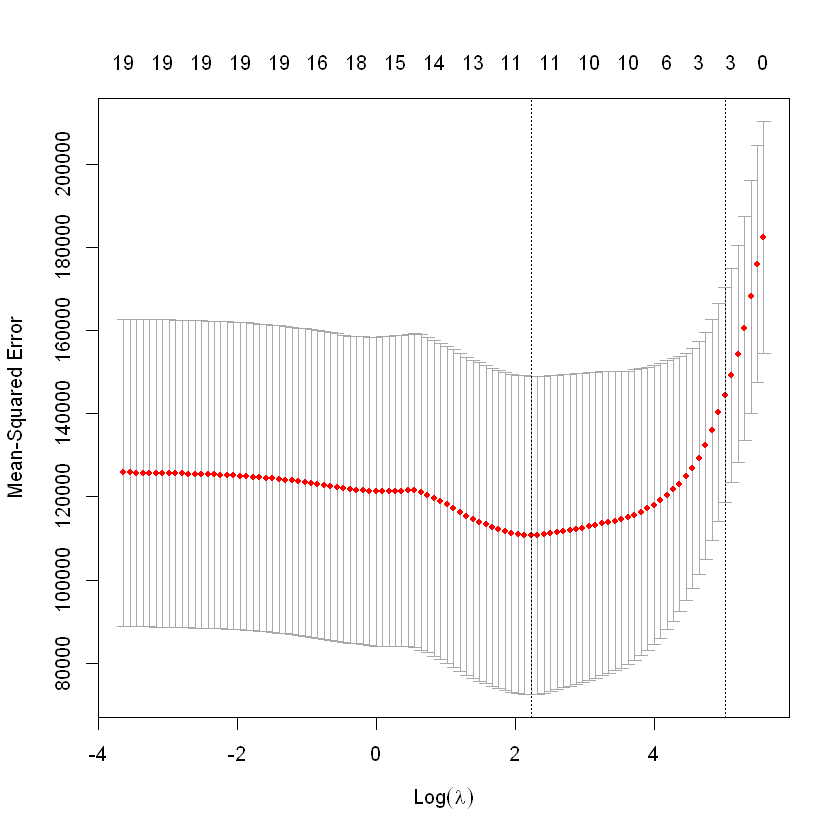

In [10]:
# 03: Lasso --------------------------------------------------------------------
lasso_mod <- glmnet(x[train, ], y[train], alpha = 1,lambda = grid)
plot(lasso_mod)

# 03b: Lasso CV: ---------------------------------------------------------------
set.seed (1)
cv_out <- cv.glmnet(x[train, ], y[train], alpha = 1)
plot(cv_out)
bestlam <- cv_out$lambda.min
bestlam
lasso.pred <- predict(lasso_mod, s = bestlam, newx = x[test, ])
mean((lasso.pred - y_test)^2)

out <- glmnet(x, y, alpha = 1, lambda = grid)
lasso_coef <- predict(out, type = "coefficients", s = bestlam)[1:20, ]
lasso_coef
lasso_coef[lasso_coef !=0]

In [12]:
####################
#
#now with Auto

x=model.matrix (mpg~horsepower+I(horsepower ^2)+
                  cylinders+displacement+weight+acceleration
                +year,mtcars)[,-1]
y=mtcars$mpg
grid =10^ seq (10,-2, length =100)

data("mtcars")
x <- model.matrix(mpg ~ hp + I(hp^2) + cyl + disp + drat + wt + qsec + vs +
                    am + gear + carb,
                  data = mtcars)[, -1]

y <- mtcars$mpg
grid <- 10^seq(10, -2, length = 100)

#alpha=0 -> Ridge Regression
ridge_mod =glmnet (x,y,alpha =0, lambda =grid)
dim(coef(ridge_mod ))
ridge_mod$lambda[50]
coef(ridge_mod)[,50]
##sum of squared parameters for this lambda 
sqrt(sum(coef(ridge_mod)[ -1 ,50]^2))

ridge_mod$lambda [60]
coef(ridge_mod)[,60]
sqrt(sum(coef(ridge_mod)[ -1 ,60]^2) )

plot(grid,coef(ridge_mod)["hp",],log="x",type="l",xlab="lambda")
plot(grid,coef(ridge_mod)["qsec",],log="x",type="l",xlab="lambda")

#cylinders coefficient
plot(grid,coef(ridge_mod)["cyl",],log="x",type="l",xlab="lambda")
#intercept coefficient
plot(grid,coef(ridge_mod)["(Intercept)",],log="x",type="l",xlab="lambda")

#all coefficients
matplot(grid,t(coef(ridge_mod)[-1,]),type="l",log="x",xlab="lambda")
#similar plot provided by glmnet 
plot(ridge_mod,xvar="lambda")

#coefficients when lambda=50 (s=50) 
predict(ridge_mod ,s=50, type ="coefficients")[1:8 ,]

#fit using a training set and compare using the test data set
set.seed (1)
train=sample (1: nrow(x), nrow(x)/2)
test=(-train)
y_test=y[test]
ridge_mod =glmnet (x[train ,],y[train],alpha =0, lambda =grid ,
                   thresh =1e-12)
##predictions on test data when lambda=4
ridge_pred=predict (ridge_mod ,s=4, newx=x[test ,])
##MSE-test when lambda=4
mean(( ridge_pred -y_test)^2)


##MSE-test when lambda=infinity (null model)
mean(( mean(y[train ])-y_test)^2)

rpMSE<-rep(NA,100)
for(i in 1:100){
  #predict  type="coefficients" output the coefficients for this value lambda (s)
  #         newx= test x data predicted values
  ridge_pred=predict (ridge_mod ,s=grid[i], newx=x[test ,])
  rpMSE[i]<-   mean(( ridge_pred -y_test)^2)
}
#The MSE-Test for different values of lambda
plot(grid,rpMSE,log="x",type="l")
#Note that the minimum is near to zero

#When lamda very large we get the same  MSE-Train as when we 
#take the mean of the y values directly
ridge_pred=predict (ridge_mod ,s=1e10 ,newx=x[test ,])
mean((ridge_pred -y_test)^2)


#fit a "ridge regression" for lambda=0

#error in book below
ridge_pred=predict (ridge_mod ,s=0, newx=x[test ,], exact=T)
#error in book above 
##use the following command instead

ridge_pred=predict(ridge_mod ,s=0, newx=x[test ,], exact=T,x=x[train ,],y=y[train])
mean((ridge_pred -y_test)^2)


#CV
set.seed (1)
#use the default set of lambdas
cv_out =cv.glmnet(x[train ,],y[train],alpha =0)
plot(cv_out)
###minimum CV-MSE is by the smallest value of lambda 
bestlam =cv_out$lambda.min
bestlam
range(cv_out$lambda)
#bestlam is the smallest value of lambda, not good 

#try with another lambda-grid with a much lower starting value
grid2 =seq (0.00001,1.0, length =100)
cv_out =cv.glmnet(x[train ,],y[train],lambda=grid2,alpha =0)
plot(cv_out)
bestlam =cv_out$lambda.min
bestlam
range(cv_out$lambda)
#bestlam is still the smallest value of lambda used, not good 

#it looks like lambda=0 is the best lambda
ridge_pred=predict(ridge_mod ,s=0, newx=x[test ,], exact=T,x=x[train ,],y=y[train])
mean((ridge_pred -y_test)^2)
###8.49
lm.obj<-lm(mpg~horsepower+I(horsepower ^2)+
             cylinders+displacement+weight+acceleration
           +year,data=Auto,subset=train)
lse.pred<-predict.lm(lm.obj,Auto[test,])
mean((lse.pred-y_test)^2)
###8.49


####now quickly run through the same using the lasso (alpha=1)
lasso_mod =glmnet (x[train ,],y[train],alpha =1, lambda =grid)
plot(lasso_mod,xvar="lambda")


set.seed (1)
cv_out =cv.glmnet (x[train ,],y[train],alpha =1)
plot(cv_out)
cv_out =cv.glmnet (x[train ,],y[train],alpha =1,lambda=grid2)
plot(cv_out)
bestlam =cv_out$lambda.min
bestlam
#so again the best lambda is equal to 0 -> least squares regression 
#and the same results as with ridge regression  

###lm. model from cross validation model selection 
### workshop 5
## fitted using these training data
lm.cv.obj<-lm(mpg~horsepower +I(horsepower ^2)+ year + weight
              ,data=Auto,subset=train)
select.pred<-predict.lm(lm.cv.obj,Auto[test,])
###Test MSE using model selection
mean((select.pred-y_test)^2)
###Test MSE using least squares/shrinkage methods
mean((lse.pred-y_test)^2)






ERROR: Error in eval(predvars, data, env): object 'horsepower' not found


2.2 The mtcars data set

In [13]:
#==============================================================================#
# Shrinkage Regression: mtcars data set                                        #
#==============================================================================#
rm(list = ls(all.names = TRUE))

# 00: packages -----------------------------------------------------------------
library(glmnet)
library (ISLR2)

# 01: data preparation ---------------------------------------------------------
data("mtcars")
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

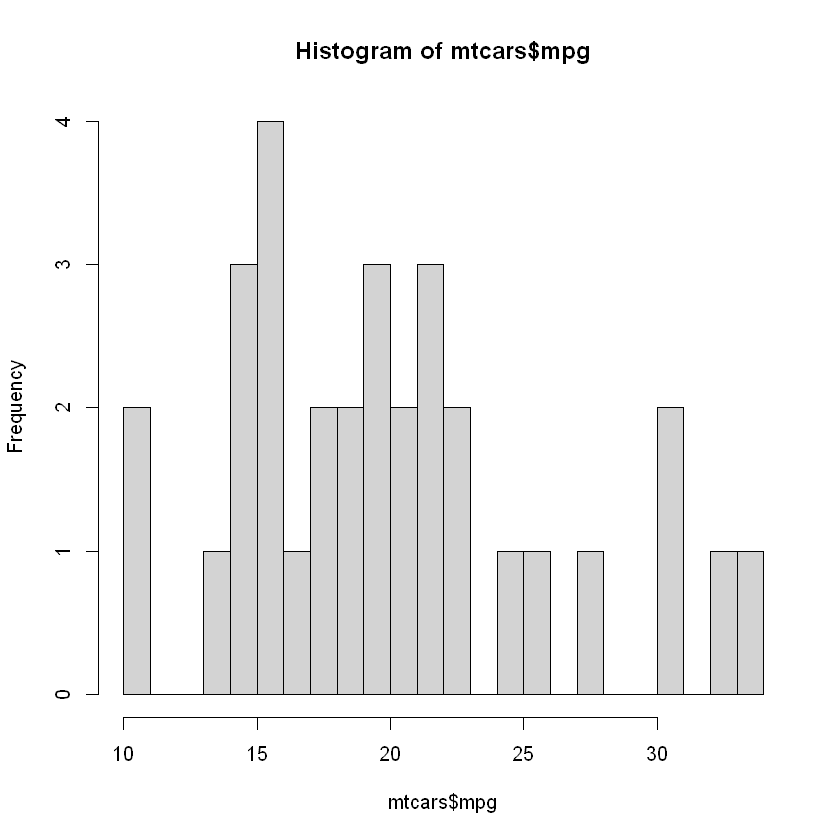

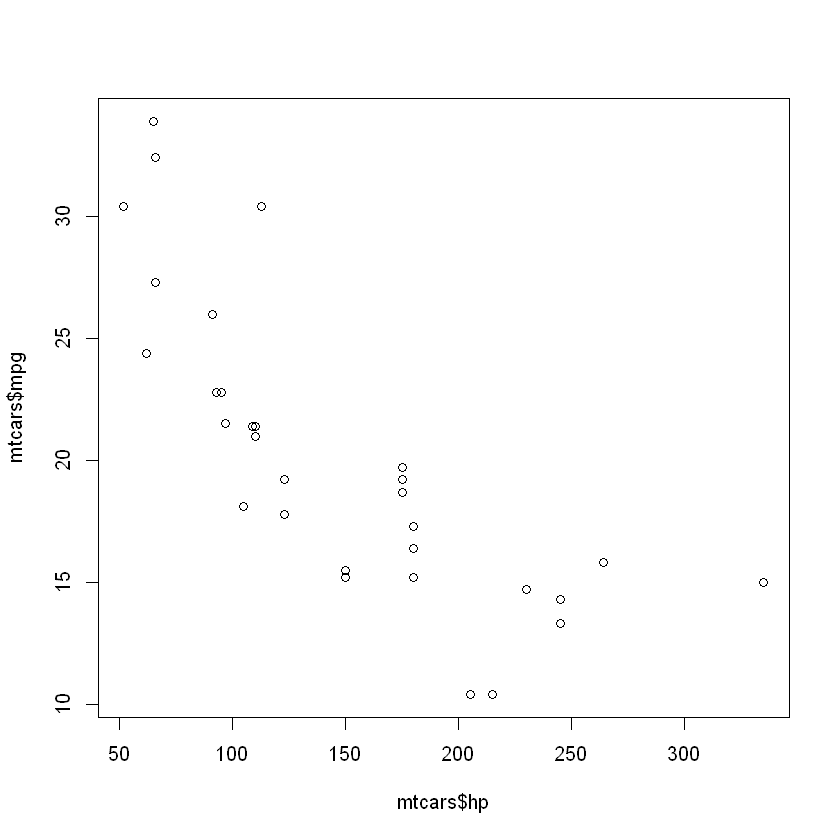

In [14]:
# 03: data exploration ---------------------------------------------------------
hist(mtcars$mpg, breaks = 30)
plot(mtcars$hp, mtcars$mpg)

[1]  12 100

[1] 11497.57

(Intercept)            hp       I(hp^2)           cyl          disp 
 2.008595e+01 -3.510749e-05 -8.480922e-08 -1.479549e-03 -2.120288e-05 
         drat            wt          qsec            vs            am 
 3.950200e-03 -2.749745e-03  7.259038e-04  4.082760e-03  3.727738e-03 
         gear          carb 
 2.017985e-03 -1.057310e-03

[1] 0.007850986

[1] 705.4802

(Intercept)            hp       I(hp^2)           cyl          disp 
 2.001916e+01 -5.437757e-04 -1.310937e-06 -2.292917e-02 -3.288109e-04 
         drat            wt          qsec            vs            am 
 6.138015e-02 -4.286022e-02  1.116810e-02  6.312253e-02  5.826447e-02 
         gear          carb 
 3.143488e-02 -1.644894e-02

[1] 0.1220382

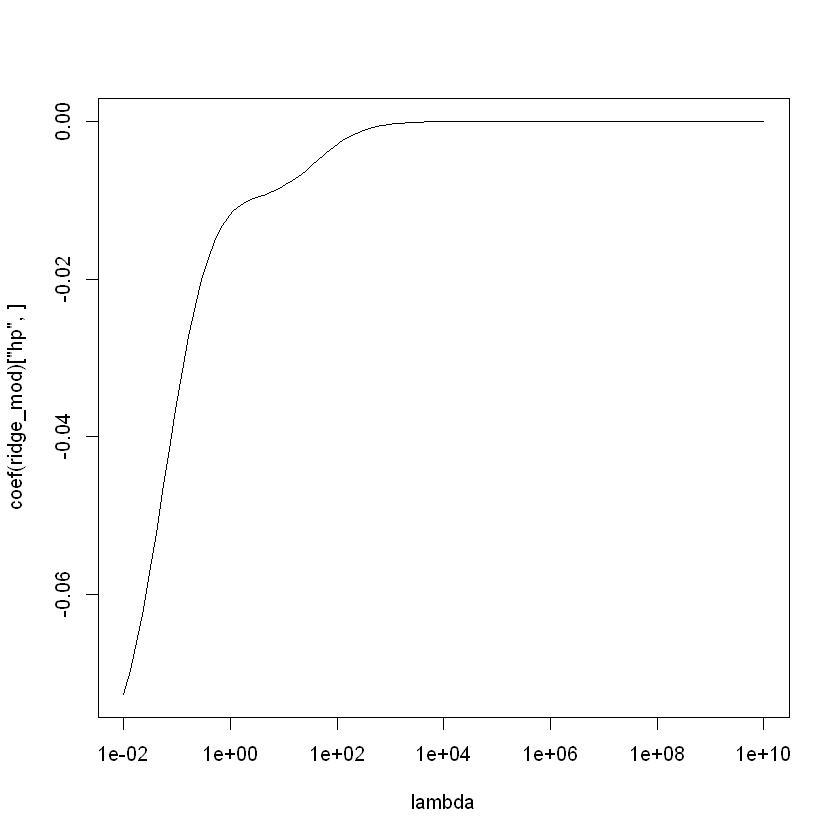

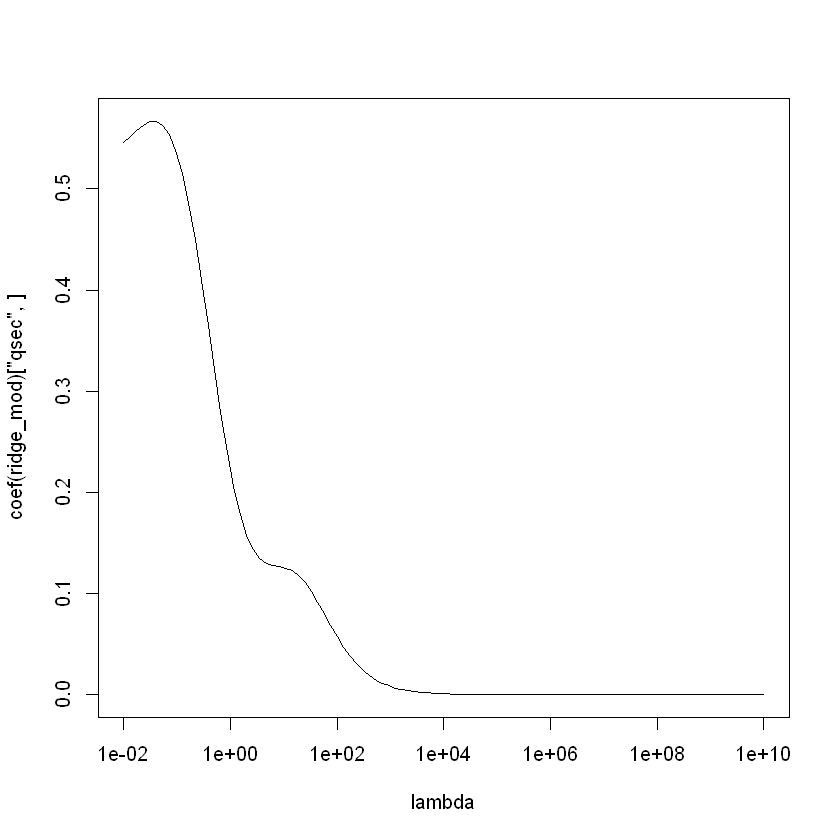

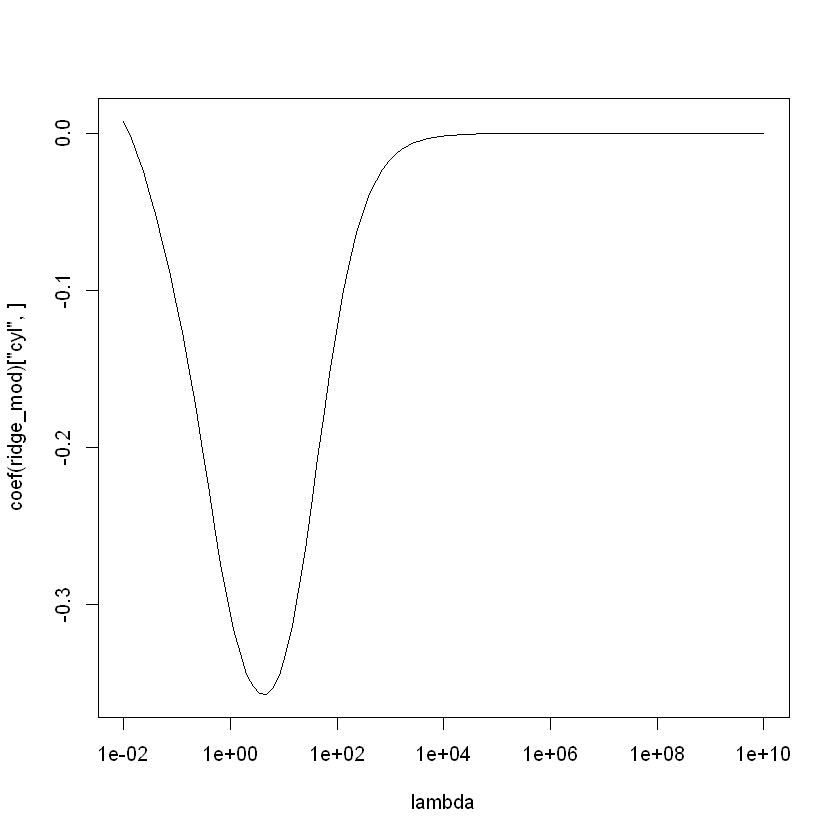

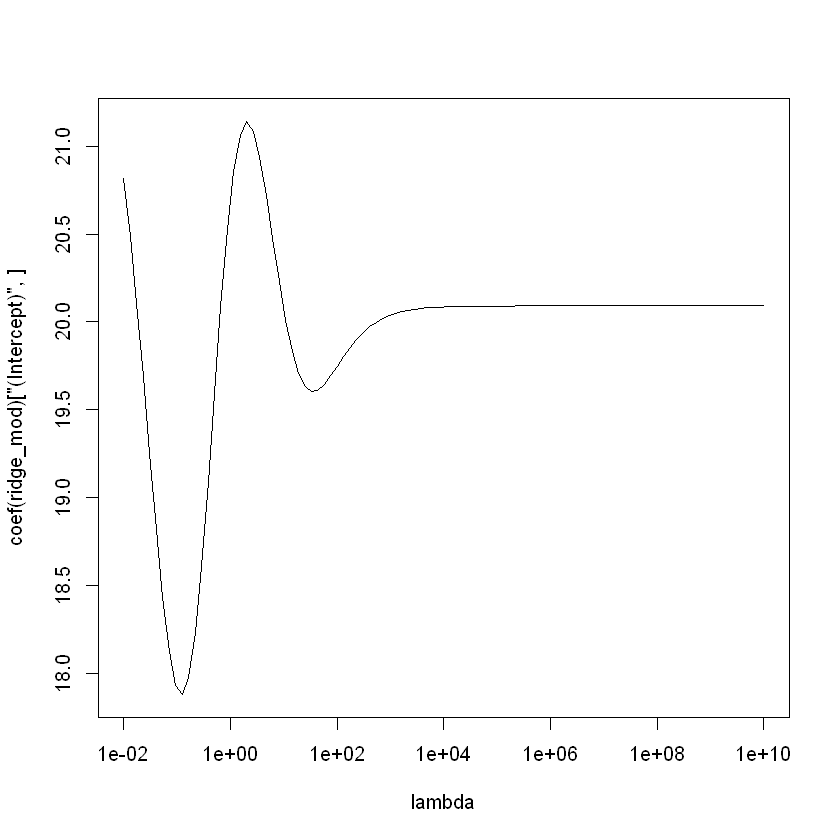

In [15]:
# 02: ridge regression ---------------------------------------------------------
x <- model.matrix(mpg ~ hp + I(hp^2) + cyl + disp + drat + wt + qsec + vs +
                    am + gear + carb,
                  data = mtcars)[, -1]
y <- mtcars$mpg
grid <- 10^seq(10, -2, length = 100)
ridge_mod <- glmnet(x, y, alpha = 0, lambda = grid)
dim(coef(ridge_mod ))

# strong penalization
ridge_mod$lambda[50]
coef(ridge_mod)[, 50]
sqrt(sum(coef(ridge_mod)[-1, 50]^2))

# weaker penalization
ridge_mod$lambda[60]
coef(ridge_mod)[, 60]
sqrt(sum(coef(ridge_mod)[-1, 60]^2))

# Add plots for change in coeff wrt lambda
plot(grid, coef(ridge_mod)["hp", ], log = "x", type = "l", xlab = "lambda")
plot(grid, coef(ridge_mod)["qsec", ], log = "x", type = "l", xlab = "lambda")
plot(grid, coef(ridge_mod)["cyl", ], log = "x", type = "l", xlab = "lambda")
plot(grid, coef(ridge_mod)["(Intercept)", ], log = "x", type = "l", xlab = "lambda")


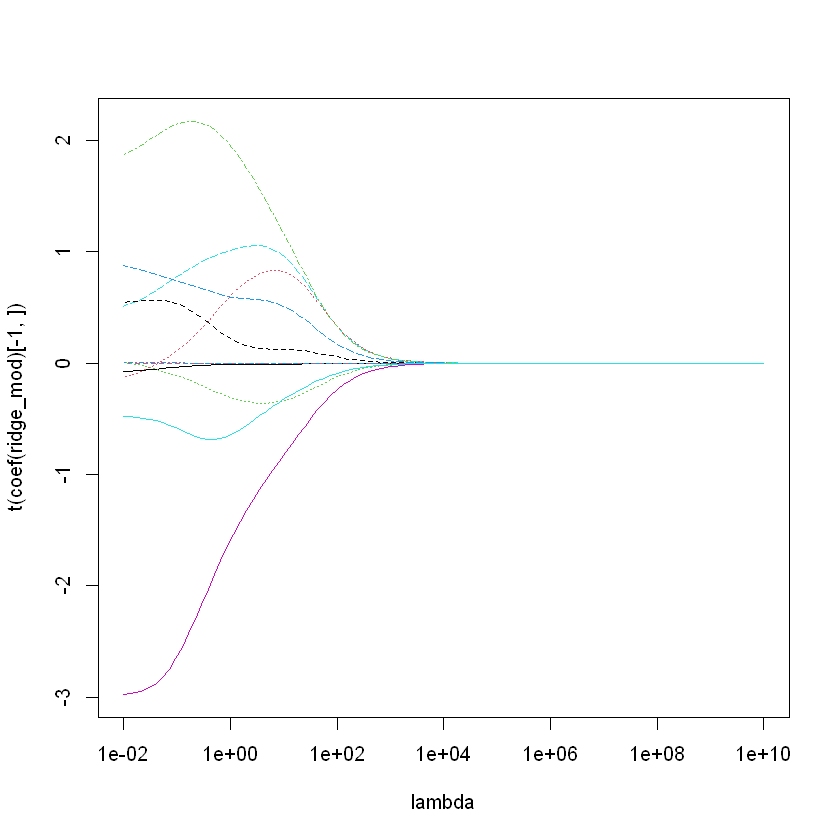

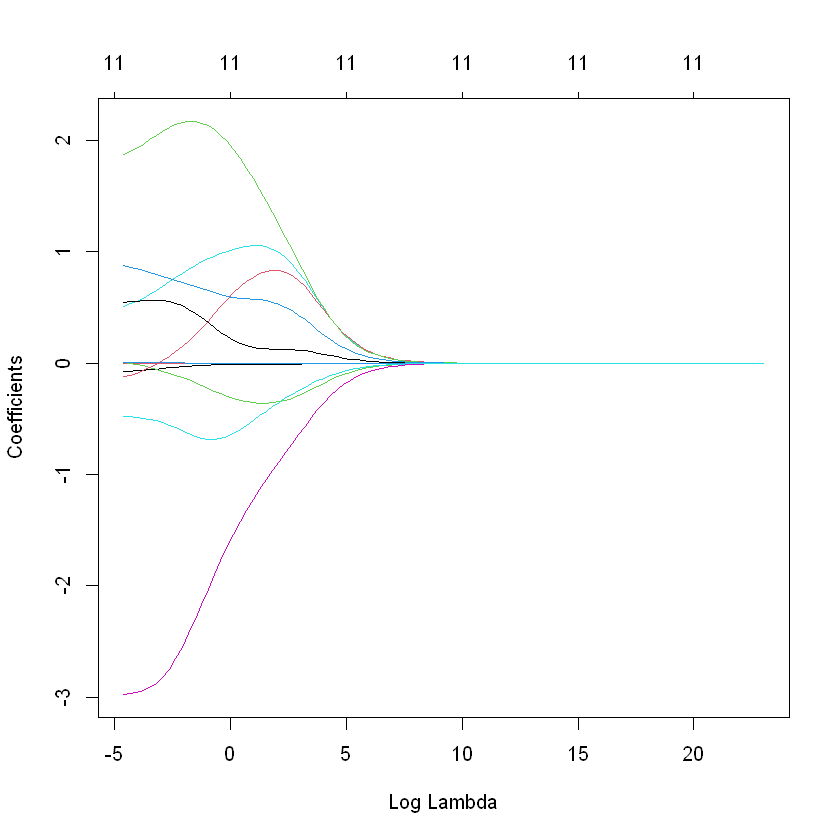

In [16]:
# All together except the intercept
matplot(grid, t(coef(ridge_mod)[-1, ]), type = "l", log = "x", xlab = "lambda")
# If you plot ridge_mod then you get a very similar plot 
plot(ridge_mod,xvar="lambda")

In [17]:
# Predictions
predict(ridge_mod, s = 50, type ="coefficients")[1:11, ]

(Intercept)            hp       I(hp^2)           cyl          disp 
 1.962743e+01 -4.569971e-03 -1.070174e-05 -1.928035e-01 -2.780065e-03 
         drat            wt          qsec            vs            am 
 5.296373e-01 -3.862794e-01  8.589070e-02  5.131096e-01  5.381038e-01 
         gear 
 2.766838e-01

In [18]:
# Train/Test split
set.seed (1)
train <- sample (1: nrow(x), nrow(x)/2)
test <- (-train)
y_test <- y[test]

ridge_mod <- glmnet(x[train, ], y[train], alpha = 0, lambda = grid, thresh = 1e-12)
ridge_pred <- predict(ridge_mod, s = 4, newx = x[test, ])

# Test: MSE
mean((ridge_pred - y_test)^2)

# Intercept Model: MSE
mseNullModel <- mean(( mean(y[train ])-y_test)^2)
mseNullModel

# Test-MSE for very large penalization
ridge_pred <- predict (ridge_mod , s= 1e10, newx = x[test, ])
mean((ridge_pred - y_test)^2)


[1] 4.724254

[1] 39.00781

[1] 39.00781

In [19]:
# Comparison with OLS regression:
ridge_pred <- predict(ridge_mod, s = 0, newx = x[test, ], exact = TRUE, 
                      x = x[train, ], y = y[train])
mseFullModel <- mean((ridge_pred - y_test)^2)
mseFullModel
lm(y ~ x, subset =train)$coefficients
predict(ridge_mod, s = 0, exact = TRUE, x = x[train, ], 
        y = y[train], type = "coefficients")[1:11, ]

[1] 85.16026

(Intercept)          xhp     xI(hp^2)         xcyl        xdisp        xdrat 
14.390981224 -0.419037573  0.001005379 -2.064101728  0.045050914 -5.654805087 
         xwt        xqsec          xvs          xam        xgear        xcarb 
-0.970306651  2.723485125 -5.780891107  0.544017703  5.418124645  0.997319077

(Intercept)           hp      I(hp^2)          cyl         disp         drat 
14.383925999 -0.418992544  0.001005262 -2.063773515  0.045052564 -5.654395912 
          wt         qsec           vs           am         gear 
-0.971263758  2.723661063 -5.780063242  0.544737321  5.417670605

Warning message:
"Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold"


[1] 3.569359

[1] 4.874979

(Intercept)            hp       I(hp^2)           cyl          disp 
 2.091575e+01 -9.478171e-03 -1.507519e-05 -3.570991e-01 -5.024318e-03 
         drat            wt          qsec            vs            am 
 1.057011e+00 -1.129728e+00  1.348129e-01  8.043671e-01  1.554261e+00 
         gear 
 5.677771e-01

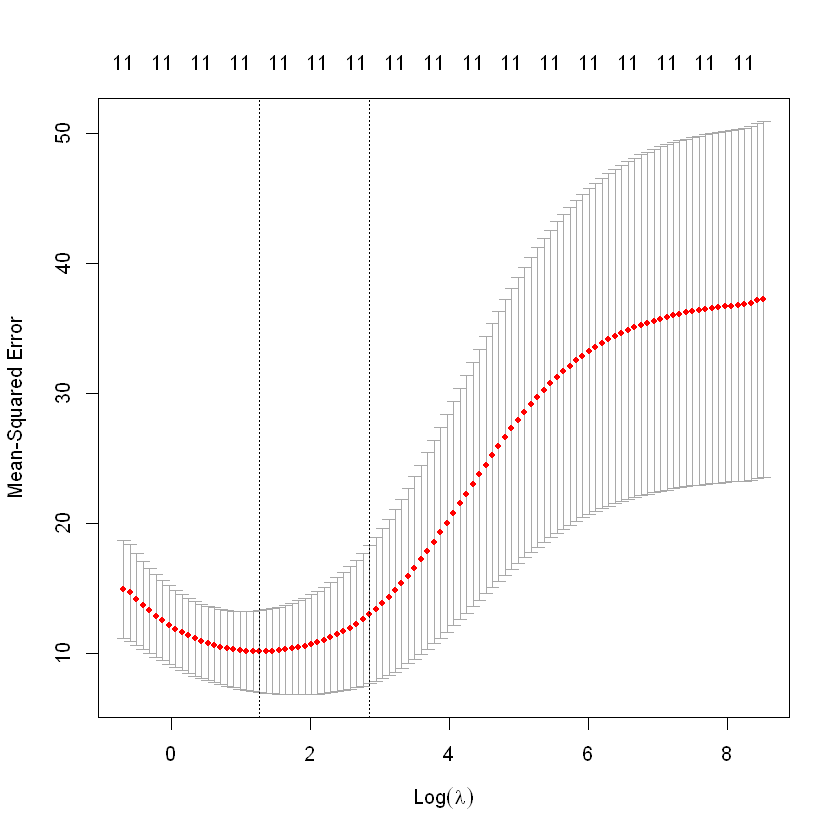

In [20]:
# 02b: Ridge CV: ---------------------------------------------------------------
set.seed (1)
cv_out <- cv.glmnet(x[train, ], y[train], alpha = 0)
plot(cv_out)
bestlam <- cv_out$lambda.min
bestlam

ridge_pred <- predict(ridge_mod, s = bestlam, newx = x[test, ])
mseBestLam <- mean((ridge_pred - y_test)^2)
mseBestLam

out <- glmnet (x, y, alpha = 0)
predict(out, type = "coefficients", s = bestlam )[1:11, ]

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
"collapsing to unique 'x' values"


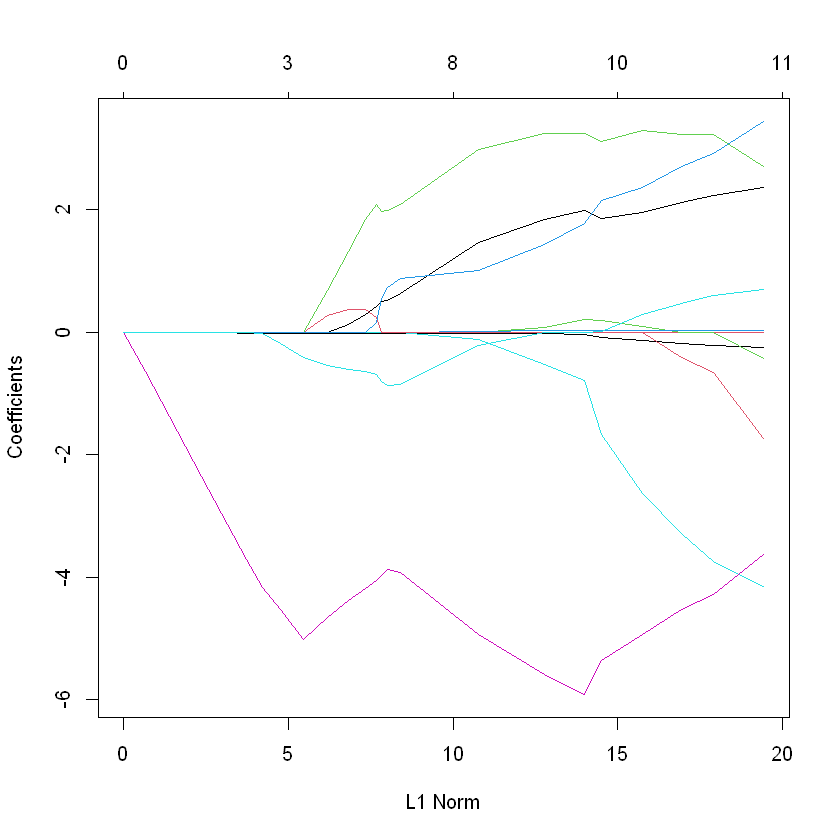

In [21]:
# 03: Lasso --------------------------------------------------------------------
lasso_mod <- glmnet(x[train, ], y[train], alpha = 1,lambda = grid)
plot(lasso_mod)

Warning message:
"Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold"


[1] 0.8638307

[1] 7.426212

hp      I(hp^2)          cyl         disp         drat           wt 
-0.011181331  0.000000000 -0.881123408  0.000000000  0.000000000 -2.672656053 
        qsec           vs           am         gear 
 0.000000000  0.000000000  0.000778546  0.000000000

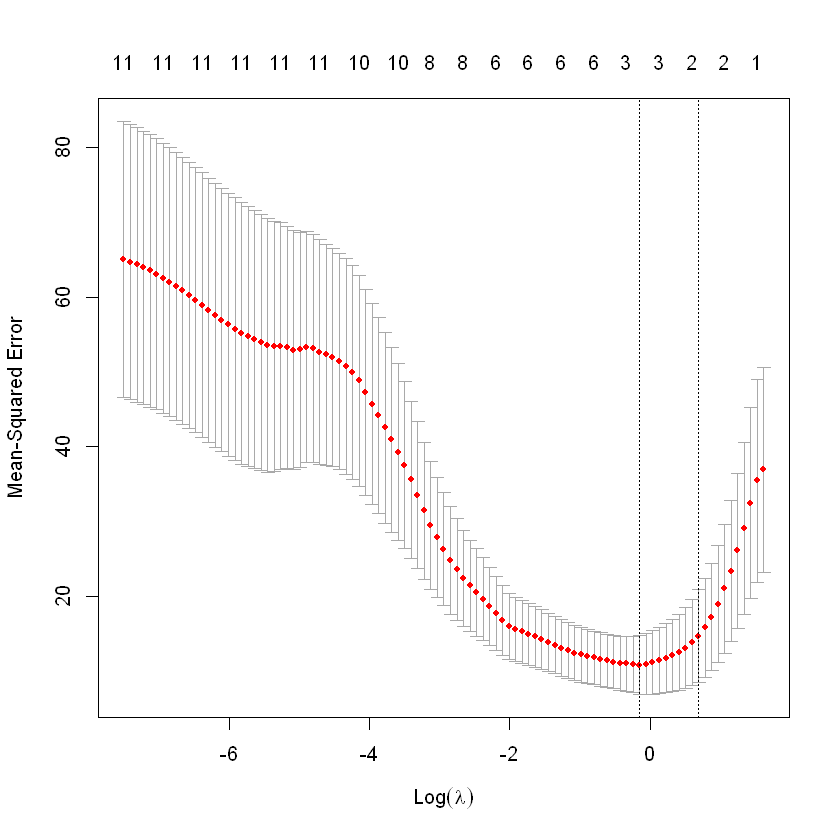

In [22]:
# 03b: Lasso CV: ---------------------------------------------------------------
set.seed (1)
cv_out <- cv.glmnet(x[train, ], y[train], alpha = 1)
plot(cv_out)
bestlam <- cv_out$lambda.min
bestlam
lasso.pred <- predict(lasso_mod, s = bestlam, newx = x[test, ])
mean((lasso.pred - y_test)^2)

out <- glmnet(x, y, alpha = 1, lambda = grid)
lasso_coef <- predict(out, type = "coefficients", s = bestlam)[2:11, ]
lasso_coef
varLasso <- lasso_coef[lasso_coef !=0]